In [1]:
import pandas as pd

# Load external data
df_external = pd.read_csv('random_smiles.csv')

In [2]:
# Get SMILES and labels (if available)
smiles_list = df_external['smile'].tolist()
#external_labels = df_external['class'].tolist()

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [4]:
import pickle

# Load tokenizer used during training
with open('tokenizer2.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

In [5]:

X_encoded = tokenizer.texts_to_sequences(smiles_list)


In [6]:
# Encode and pad new SMILES
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_padded = pad_sequences(X_encoded, maxlen=181, padding='pre')

In [7]:
print(X_padded.shape)

(1000, 181)


In [8]:
# Step 1: Get the mapping from index to character
index_to_char = {index: char for char, index in tokenizer.word_index.items()}

# Step 2: Convert each encoded sequence back to a SMILES string
RX_decoded = []
for sequence in X_encoded:
    decoded = ''.join([index_to_char.get(index, '') for index in sequence])
    RX_decoded.append(decoded)


In [9]:
for original, decoded in zip(smiles_list, RX_decoded):
    if original != decoded:
        print(f"Mismatch!\nOriginal: {original}\nDecoded: {decoded}")
    else:
        print("Match ✅")

Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅
Match ✅


In [11]:
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd

# Load the model
loaded_model = load_model('lstm_model.h3')

loaded_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 181, 64)           2496      
                                                                 
 batch_normalization (Batch  (None, 181, 64)           256       
 Normalization)                                                  
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)               

In [12]:
# Predict
predicted_probs = loaded_model.predict(X_padded)
# For binary classification, convert probabilities to 0/1

predicted_classes = (predicted_probs > 0.5).astype(int).flatten()


# Decode sequences back to SMILES
index_to_char = {index: char for char, index in tokenizer.word_index.items()}

def decode_sequence(seq):
    return ''.join([index_to_char.get(idx, '') for idx in seq if idx != 0])

decoded_smiles = [decode_sequence(seq) for seq in X_padded]

# Convert Series to NumPy array before flattening
#true_values = np.array(external_labels).flatten()


# Then use it in the DataFrame
df_results = pd.DataFrame({
    'SMILES': decoded_smiles,
    #'True Value': true_values,
    'Predicted Value': predicted_classes,
    'Predicted prob': predicted_probs[:, 0]    
})

# Display
print(df_results.head(10))

# Save the DataFrame to CSV
df_results.to_csv("zinc_smiles_predictions.csv", index=False)



32/32 [==============================] - 1s 13ms/step
                                    SMILES  Predicted Value  Predicted prob
0     CC(C)c1cccc(c1)c2cccc3c2NC(=O)N(C3)C                1        0.567748
1            CC(C)c1cccc(c1)c2cccnc2OC(F)F                1        0.590481
2          Cc1c(ccc2n1ccn2)c3cccc(c3)C(C)C                0        0.497460
3   CC(C)c1cccc(c1)c2cc3cc[nH]c3nc2C(=O)OC                1        0.543120
4  CC(C)c1cccc(c1)c2ccc3c(c2)CNC(=O)C3(C)C                1        0.671868
5      CC(C)c1cccc(c1)c2ccc(=O)n(c2)CC3CC3                1        0.760825
6    CC(C)c1cccc(c1)c2ccc(=O)n(c2)c3ccncc3                0        0.463920
7  CC(C)c1cccc(c1)c2cc3cc[nH]c3c(c2)C(=O)N                1        0.591379
8      CC(C)c1cccc(c1)c2cc3c(c(ccn3)OC)nc2                1        0.598901
9    Cc1c(cnc2c1[nH]c(n2)C)c3cccc(c3)C(C)C                0        0.408462


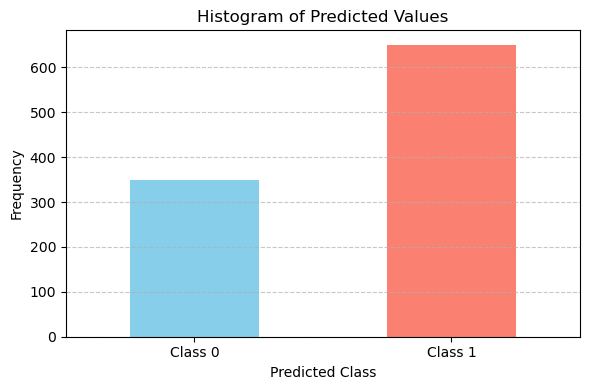

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data (assumes it's saved as a CSV file)
df = pd.read_csv('zinc_smiles_predictions.csv')  # Replace with your actual filename

# Plot histogram
plt.figure(figsize=(6, 4))
df['Predicted Value'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Values')
plt.xticks([0, 1], ['Class 0', 'Class 1'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [24]:
import shap

# Step 0: Explain predictions
subset_test = X_padded
explainer = shap.Explainer(loaded_model, subset_test)
shap_values = explainer(subset_test)

PermutationExplainer explainer: 1001it [1:54:07,  6.85s/it]                          


In [34]:
# Step 1: Map token indices to characters
index_to_char = {index: char for char, index in tokenizer.word_index.items()}

# Step 2: Convert encoded sequence to SMILES string
sequence = subset_test[387]
decoded_smiles = ''.join([index_to_char.get(index, '') for index in sequence])
token_chars = list(decoded_smiles)

In [35]:
# Determine non-zero (non-padding) token indices
non_padding_indices = [i for i, token_id in enumerate(sequence) if token_id != 0]


# Get corresponding SHAP values
shap_vals_for_sample = shap_values[387].values
shap_vals_trimmed = [shap_vals_for_sample[i] for i in non_padding_indices]

In [36]:
# Step 4: Ensure alignment
if len(shap_vals_trimmed) != len(token_chars):
    print(f"Warning: SHAP values ({len(shap_vals_for_sample)}) and token chars ({len(token_chars)}) mismatch.")
    # Optionally trim or pad the shorter one


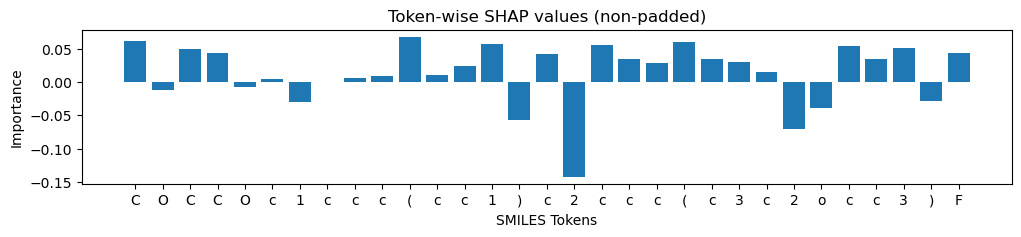

In [37]:
# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 2))
plt.bar(range(len(token_chars)), shap_vals_trimmed, tick_label=token_chars)
plt.title("Token-wise SHAP values (non-padded)")
plt.xlabel("SMILES Tokens")
plt.ylabel("Importance")
plt.show()

In [50]:
print(decoded_smiles)

COCCOc1ccc(cc1)c2ccc(c3c2occ3)F


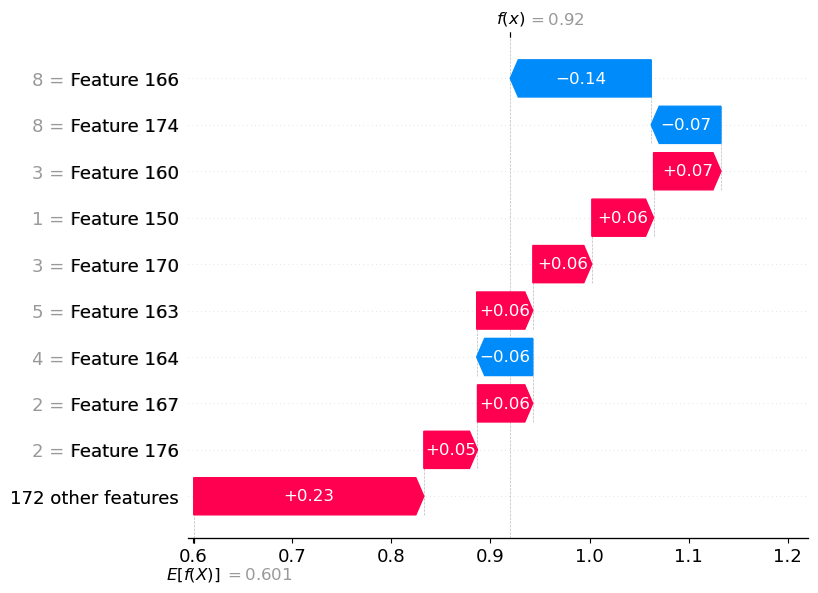

In [51]:
# Visualize the SHAP values for the first sample
shap.plots.waterfall(shap_values[387])